In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
sol = Solver(imax=30, jmax=30, kmax=1000, use_morton=False)

Creating initial gaussian condition...
Done!
Creating advection operator...
Done!
Creating diffusion operator...
Done!


It takes *soooooo* long to make these operators...bleh.

In [8]:
result = sol.run()

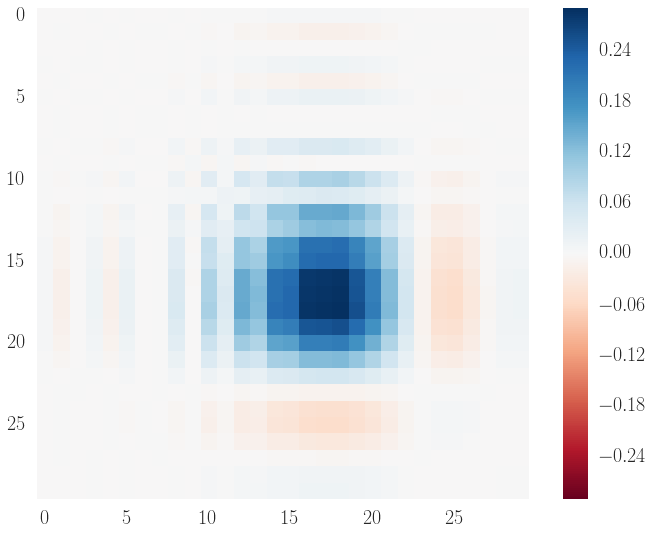

In [14]:
ski.io.imshow(result[:, :, 600])
plt.grid(False)
#plt.clim([0, 0.1])

Oh dear. Well, it was looking good for a while...lol. The boundaries must be screwed up. Also, something with diffusion, or advection, must be screwed up. Maybe it's at the edges...idk. The boundary conditions are definitely screwy.

In [35]:
%load_ext cython

In [36]:
%%cython

print -3%5

2
